 Importing libraries

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

Loading and Checking the dataset

In [115]:
df_train = pd.read_csv("./UNSW_NB15_training-set.csv")
df_test = pd.read_csv("./UNSW_NB15_testing-set.csv")
print("Length of training set: ", len(df_train))
print("Length of testing set: ", len(df_test))

Length of training set:  175341
Length of testing set:  82332


In order to ensure the balance between the training and testing sets and avoid processing twice, we decided to concatenate them into one dataframe and redivide them with a different ratio later with *sklearn.model_selection.train_test_split()*.

In [116]:
df = pd.concat([df_train, df_test])
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt  

In [117]:
print(df.index)

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       82322, 82323, 82324, 82325, 82326, 82327, 82328, 82329, 82330, 82331],
      dtype='int64', length=257673)


In [118]:
df.reset_index(drop=True, inplace=True)
print(df.index)

RangeIndex(start=0, stop=257673, step=1)


In [119]:
df.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,...,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,...,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,...,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,NaN,1.000000


In [120]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


Checking for duplicates

In [121]:
print(df.duplicated().sum())

0


There is no duplicate record.

Checking for missing values

In [122]:
print(df.isna().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

There is no missing value.

 Checking the balance between normal and attack data

In [123]:
df['label'].value_counts(normalize=True)

label
1    0.639077
0    0.360923
Name: proportion, dtype: float64

<Axes: xlabel='label'>

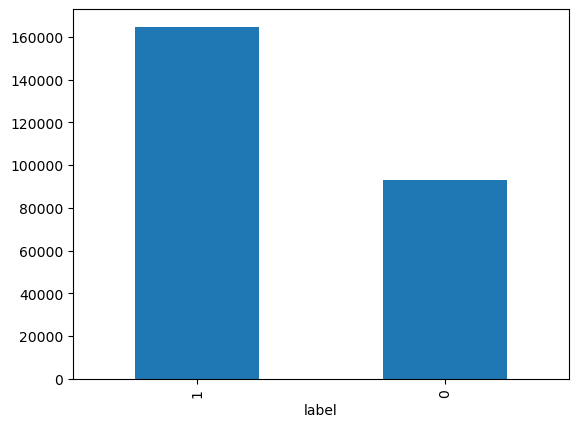

In [124]:
df['label'].value_counts().plot.bar()

<Axes: ylabel='count'>

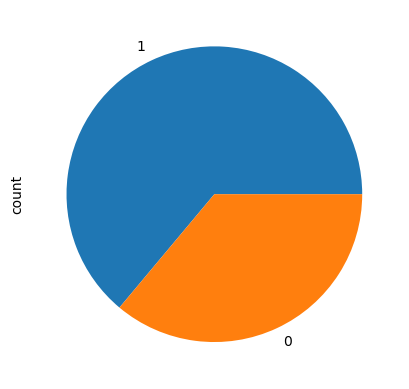

In [125]:
df['label'].value_counts().plot.pie()

 Dropping unnecessary features
.

In [126]:
df = df.drop(columns=['id', 'attack_cat'])


Encoding categorical features using LabelEncoder.

In [127]:
df_cat = df.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])

Index(['proto', 'service', 'state'], dtype='object')


In [128]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,0



Removing highly correlated features.

In [129]:
corr = df.corr()
corr

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
dur,1.000000,-0.121735,-0.006060,0.086083,0.258890,0.188382,0.204422,0.149705,-0.118622,0.008617,...,-0.090267,-0.088422,-0.090921,0.020390,0.020330,0.023299,-0.079126,-0.107793,0.034025,0.029096
proto,-0.121735,1.000000,0.160227,-0.155382,0.011504,0.022497,0.005081,0.013240,0.012864,0.054950,...,0.159938,0.146794,0.161704,0.014812,0.014806,0.025970,0.155220,0.183820,-0.585964,0.008023
service,-0.006060,0.160227,1.000000,-0.122723,0.105653,0.073418,0.096717,0.035922,-0.124198,-0.286251,...,0.047893,0.062755,0.005433,0.070997,0.070967,0.286157,0.030642,-0.042140,-0.083364,0.073552
state,0.086083,-0.155382,-0.122723,1.000000,-0.073824,-0.088923,-0.044936,-0.053032,0.437391,0.580814,...,0.348906,0.381852,0.413561,-0.045125,-0.045174,-0.075712,0.317914,0.382398,0.089740,0.462972
spkts,0.258890,0.011504,0.105653,-0.073824,1.000000,0.383221,0.964393,0.203804,-0.073668,-0.099579,...,-0.063234,-0.066604,-0.072036,0.010114,0.010135,0.004430,-0.057480,-0.066118,-0.016565,-0.043040
dpkts,0.188382,0.022497,0.073418,-0.088923,0.383221,1.000000,0.184280,0.973445,-0.093065,-0.183142,...,-0.078324,-0.084943,-0.087176,0.013203,0.013231,0.039567,-0.069019,-0.073238,-0.019895,-0.097394
sbytes,0.204422,0.005081,0.096717,-0.044936,0.964393,0.184280,1.000000,0.009969,-0.027353,-0.019939,...,-0.024496,-0.024965,-0.029291,-0.003931,-0.003929,-0.002900,-0.025494,-0.033095,-0.005903,0.019376
dbytes,0.149705,0.013240,0.035922,-0.053032,0.203804,0.973445,0.009969,1.000000,-0.055538,-0.128600,...,-0.046258,-0.050583,-0.050668,-0.009145,-0.009139,0.042458,-0.041286,-0.041118,-0.011842,-0.060403
rate,-0.118622,0.012864,-0.124198,0.437391,-0.073668,-0.093065,-0.027353,-0.055538,1.000000,0.400967,...,0.350931,0.383672,0.376051,-0.062572,-0.062543,-0.110000,0.316011,0.364168,-0.068433,0.335883
sttl,0.008617,0.054950,-0.286251,0.580814,-0.099579,-0.183142,-0.019939,-0.128600,0.400967,1.000000,...,0.325302,0.358632,0.380792,-0.114584,-0.114647,-0.131152,0.261206,0.328775,-0.210860,0.624082


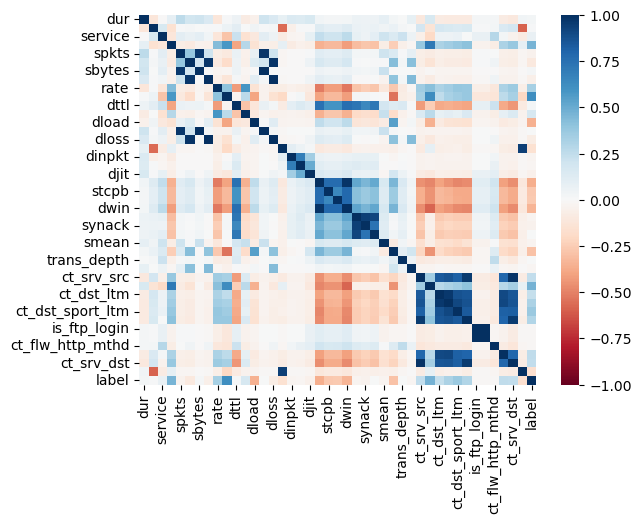

In [130]:
sns.heatmap(corr ,cmap='RdBu',vmin=-1,vmax=1)
plt.show()

In [131]:
columns = df.columns.tolist()
corr = df.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.80:
            print(columns[i]," & " ,columns[j]," = ", corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

spkts  &  sbytes  =  0.964393217155871
spkts  &  sloss  =  0.9718594116510776
dpkts  &  dbytes  =  0.9734453279792796
dpkts  &  dloss  =  0.979612084935938
sbytes  &  sloss  =  0.9957715772406667
dbytes  &  dloss  =  0.996711133831455
sinpkt  &  is_sm_ips_ports  =  0.9421206232319264
swin  &  dwin  =  0.9804584289136496
tcprtt  &  synack  =  0.9430527539834922
tcprtt  &  ackdat  =  0.9202175911910121
ct_srv_src  &  ct_dst_ltm  =  0.8409951124111326
ct_srv_src  &  ct_src_dport_ltm  =  0.8618545947587102
ct_srv_src  &  ct_dst_sport_ltm  =  0.8148560554331661
ct_srv_src  &  ct_dst_src_ltm  =  0.9539519771685965
ct_srv_src  &  ct_srv_dst  =  0.9794668130725528
ct_dst_ltm  &  ct_src_dport_ltm  =  0.9615176986568883
ct_dst_ltm  &  ct_dst_sport_ltm  =  0.871117809397576
ct_dst_ltm  &  ct_dst_src_ltm  =  0.8574940265843254
ct_dst_ltm  &  ct_src_ltm  =  0.9015817705704372
ct_dst_ltm  &  ct_srv_dst  =  0.8530854336257614
ct_src_dport_ltm  &  ct_dst_sport_ltm  =  0.9083371617418114
ct_src_dport_l

In [132]:
df = df.drop(columns=correlated_vars)

Splitting training and testing sets

In [133]:
X = df.drop(columns=['label'])
feature_list = list(X.columns)
X = np.array(X)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [134]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 180371
Testing set: 77302



Scaling all features using StandardScaler.

In [135]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Model training

In [136]:
models = {}
models['Decision Tree Classifier'] = DecisionTreeClassifier()
models['Random Forest Classifier'] = RandomForestClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()

In [137]:
train_score, accuracy, precision, training_time, y_pred = {}, {}, {}, {}, {}
for key in models.keys():
    start_time = time.time()
    models[key].fit(X_train, y_train)
    training_time[key] = time.time() - start_time
    
    y_pred[key] = models[key].predict(X_test)
    
    train_score[key] = models[key].score(X_train, y_train)
    accuracy[key] = models[key].score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key])
   

Models comparison

In [138]:
df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Training time'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Training time'] = training_time.values()

In [139]:
df_models

,Training score,Accuracy,Precision,Training time
Decision Tree Classifier,0.991351,0.927583,0.944230,2.459231
Random Forest Classifier,0.991351,0.938514,0.953127,40.683229
Gaussian Naive Bayes,0.833027,0.832630,0.844226,0.132449


Because Random Forest Classifier is the best model so far. We will choose this model for the Intrusion Detection System.
The following are more details about this model.

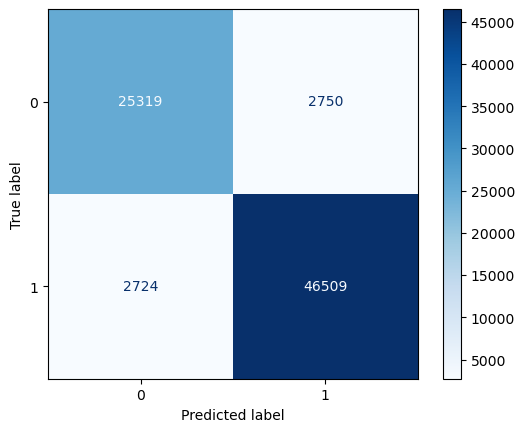

In [112]:
cm = confusion_matrix(y_test, y_pred['Decision Tree Classifier'], labels=models['Decision Tree Classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models['Decision Tree Classifier'].classes_)
disp.plot(cmap='Blues')
plt.show()

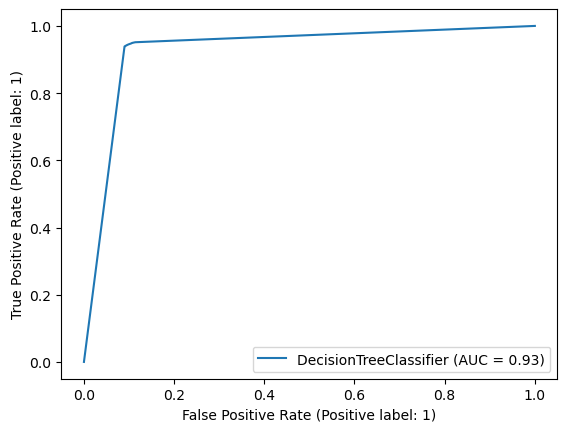

In [113]:
display = RocCurveDisplay.from_estimator(models['Decision Tree Classifier'], X_test, y_test)
plt.show()